In [161]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [162]:
image_path = "lena.pgm"

In [163]:
def cv2_imshow(img):
  plt.figure(figsize=(8,5))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#   plt.axis('off')
  plt.show()

# Reading an image in default mode

In [164]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [165]:
left_eye_start = (250, 260)
left_eye_end = (285, 280)

In [166]:
left_eye_x = 249
left_eye_y = 252
left_eye_w = 38
left_eye_h = 27

skin_color = image[left_eye_y - 20:left_eye_y, left_eye_x:left_eye_x + left_eye_w].mean()

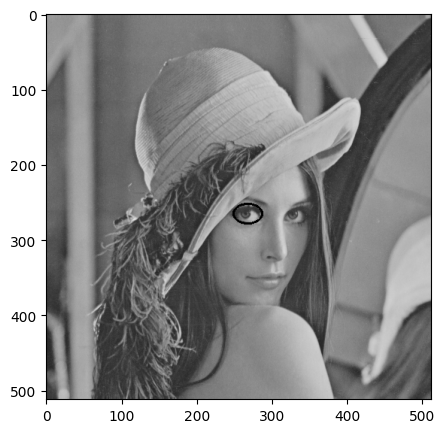

In [167]:
teste = image.copy()
teste = cv2.ellipse(teste, (left_eye_x + left_eye_w//2, left_eye_y + left_eye_h//2), (left_eye_w//2, left_eye_h//2), 0, 0, 360, (0, 0, 255), 2)

cv2_imshow(teste)

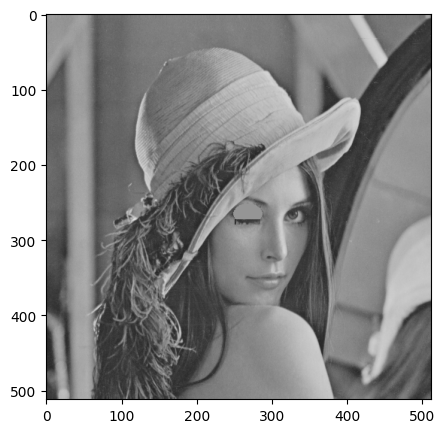

In [170]:
def blink_with_ellipse(image, x, y, w, h, skin_color):
    eyebrow_start_x = x + 2
    eyebrow_start_y = y + 2
    eyebrow_w = w - 4
    eyebrow_h = h - 20
    (cX, cY) = (eyebrow_w // 2, eyebrow_h // 2)
    
    eyebrow_region = image[eyebrow_start_y:eyebrow_start_y + eyebrow_h, eyebrow_start_x:eyebrow_start_x + eyebrow_w].copy()
    M = cv2.getRotationMatrix2D(center=(cX, cY), angle=180, scale=1) 
    # M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
    eyebrow_closed = cv2.warpAffine(eyebrow_region, M, (eyebrow_w, eyebrow_h))
    
    img_closed_eye = image.copy()
    cv2.ellipse(img_closed_eye, (x + w//2, y + h//2), (w//2, h//2), 0, 0, 360, int(skin_color), -1)
    
    closed_eyebrow_y = eyebrow_start_x + h - 5
    img_closed_eye[closed_eyebrow_y:closed_eyebrow_y + eyebrow_h, eyebrow_start_x:eyebrow_start_x + eyebrow_w] = eyebrow_closed

    return img_closed_eye

blinked_image = blink_with_ellipse(image, left_eye_x, left_eye_y, left_eye_w, left_eye_h, skin_color)

cv2_imshow(blinked_image)

In [172]:
def blink_3_times(image, x, y, w, h, skin_color, n_blinks=3, delay=0.5):
    img_closed_eye = blink_with_ellipse(image, x, y, w, h, skin_color)

    for _ in range(n_blinks):
        cv2.imshow('Lena Blinking with Ellipse', image)
        cv2.waitKey(500)
        
        cv2.imshow('Lena Blinking with Ellipse', img_closed_eye)
        cv2.waitKey(500)

# Chamar a função para piscar o olho direito
blink_3_times(image, left_eye_x, left_eye_y, left_eye_w, left_eye_h, skin_color)

# Fechar todas as janelas após a animação
cv2.destroyAllWindows()